In [3]:
import os
import sys

import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize, scale
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from collections import OrderedDict

from synchromesh.scripts.utils import read_str_list, sanitize_mtx, norm, do_pf, do_log_pf
from synchromesh.scripts.plot import  plot_depth_norm, plot_depth_dist, plot_knee, plot_pc_depth, plot_mean_var, plot_monotone, plot_example_gene

from scipy.sparse import csr_matrix
from scipy.io import mmread, mmwrite
from scipy import stats


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=15


alpha = 0.33

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = fsize
%config InlineBackend.figure_format = 'retina'

In [8]:
raw = pd.read_csv("synchromesh/data/size_raw.txt", header=None, sep="\t", names=["ds", "ncells", "nbytes"])
sct = pd.read_csv("synchromesh/data/size_sctransform.txt", header=None, sep="\t", names=["ds", "ncells", "nbytes"])

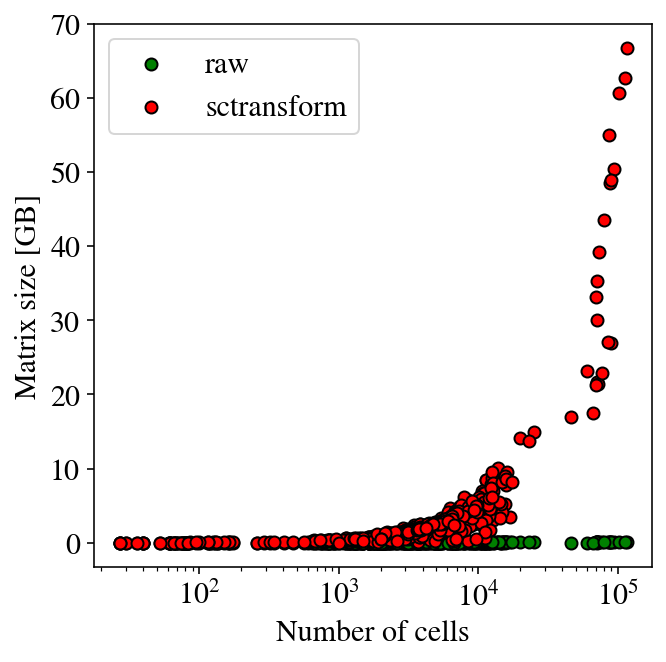

In [23]:
fig, ax = plt.subplots(figsize=(5,5))

x = raw["ncells"]
y = raw["nbytes"] / 1e9
ax.scatter(x,y, label="raw", edgecolor="k", facecolor="green")

y = sct["nbytes"] / 1e9
ax.scatter(x,y, label="sctransform", edgecolor="k", facecolor="red")

ax.set(**{
    "xlabel": "Number of cells",
    "ylabel": "Matrix size [GB]",
    "xscale": "log",
#     "yscale": "log"
})

ax.legend()

fig.savefig(f"memory.pdf", facecolor='white', transparent=False, dpi=300, bbox_inches="tight")
fig.show()
